In [40]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
old_datadir = '/content/ItemSales_9-1-2023_9-1-2024.xlsx'
new_datadir = '/content/ItemSales_9-2-2024_10-29-2024.xlsx'
old_pathFile = os.path.join(old_datadir)
new_pathFile = os.path.join(new_datadir)
old_df = pd.read_excel(old_pathFile)
new_df = pd.read_excel(new_pathFile)

In [41]:
print(old_df[['Date','Time']].head())
print(new_df[['Date','Time']].head())
print(old_df[['Date','Time']].tail())
print(new_df[['Date','Time']].tail())

        Date      Time
0 2024-08-31  09:38:56
1 2024-08-29  17:14:45
2 2024-08-29  17:14:45
3 2024-08-29  17:14:45
4 2024-08-29  17:14:45
        Date      Time
0 2024-10-29  13:55:54
1 2024-10-29  13:49:58
2 2024-10-29  13:46:29
3 2024-10-29  13:12:22
4 2024-10-29  13:10:34
            Date      Time
16336 2023-09-01  11:06:12
16337 2023-09-01  11:05:24
16338 2023-09-01  11:04:36
16339 2023-09-01  11:04:07
16340 2023-09-01  11:04:07
           Date      Time
4645 2024-09-02  11:08:07
4646 2024-09-02  11:06:50
4647 2024-09-02  11:06:26
4648 2024-09-02  11:01:53
4649 2024-09-02  11:01:14


In [42]:
# Changed order of two dfs
rev_old_df = old_df[::-1].reset_index(drop=True)
rev_new_df = new_df[::-1].reset_index(drop=True)
# Check head and tail
print(rev_old_df[['Date','Time']].head())
print(rev_new_df[['Date','Time']].head())
print(rev_old_df[['Date','Time']].tail())
print(rev_new_df[['Date','Time']].tail())

        Date      Time
0 2023-09-01  11:04:07
1 2023-09-01  11:04:07
2 2023-09-01  11:04:36
3 2023-09-01  11:05:24
4 2023-09-01  11:06:12
        Date      Time
0 2024-09-02  11:01:14
1 2024-09-02  11:01:53
2 2024-09-02  11:06:26
3 2024-09-02  11:06:50
4 2024-09-02  11:08:07
            Date      Time
16336 2024-08-29  17:14:45
16337 2024-08-29  17:14:45
16338 2024-08-29  17:14:45
16339 2024-08-29  17:14:45
16340 2024-08-31  09:38:56
           Date      Time
4645 2024-10-29  13:10:34
4646 2024-10-29  13:12:22
4647 2024-10-29  13:46:29
4648 2024-10-29  13:49:58
4649 2024-10-29  13:55:54


In [43]:
# merge both dfs by rows
merged_df = pd.concat([rev_old_df, rev_new_df], ignore_index=True)
print(merged_df[['Date','Time']].head())
print(merged_df[['Date','Time']].tail())

        Date      Time
0 2023-09-01  11:04:07
1 2023-09-01  11:04:07
2 2023-09-01  11:04:36
3 2023-09-01  11:05:24
4 2023-09-01  11:06:12
            Date      Time
20986 2024-10-29  13:10:34
20987 2024-10-29  13:12:22
20988 2024-10-29  13:46:29
20989 2024-10-29  13:49:58
20990 2024-10-29  13:55:54


### 4. Data Description

In [44]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20991 entries, 0 to 20990
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   20991 non-null  datetime64[ns]
 1   Time                   20991 non-null  object        
 2   Time Zone              20991 non-null  object        
 3   Category               18791 non-null  object        
 4   Item                   20991 non-null  object        
 5   Qty                    20991 non-null  float64       
 6   Price Point Name       18803 non-null  object        
 7   SKU                    26 non-null     object        
 8   Modifiers Applied      6 non-null      object        
 9   Gross Sales            20991 non-null  float64       
 10  Discounts              20991 non-null  float64       
 11  Net Sales              20991 non-null  float64       
 12  Tax                    20991 non-null  float64       
 13  T

### 5. Data Dimensions

In [45]:
print("Dimension of the data: ", merged_df.shape)

no_of_rows = merged_df.shape[0]
no_of_columns = merged_df.shape[1]
print("Number of rows: ", no_of_rows)
print("Number of columns: ", no_of_columns)
#

Dimension of the data:  (20991, 29)
Number of rows:  20991
Number of columns:  29


In [46]:
merged_df.head()

,Date,Time,Time Zone,Category,Item,Qty,Price Point Name,SKU,Modifiers Applied,Gross Sales,...,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID,Unit,Count,Itemization Type,Fulfillment Note,Token
0,2023-09-01,11:04:07,Eastern Time (US & Canada),Soup/Salad,Soup - Non-Dickinson Student or Non-Meal Plan,1.0,Regular,NaN,NaN,5.0,...,Farm Works,NaN,7192H4V4CMX48AR6GNENJJWP3W,Sara Galli,NaN,ea,1,Physical Good,NaN,FS3KUKFBMGFUYW7BYAAVUTDK
1,2023-09-01,11:04:07,Eastern Time (US & Canada),Farm Store,Beef Jerky - SMOKE,1.0,Small,NaN,NaN,7.0,...,Farm Works,NaN,7192H4V4CMX48AR6GNENJJWP3W,Sara Galli,NaN,ea,1,Physical Good,NaN,UUFDSYQ3C7EWT72TSC26O33V
2,2023-09-01,11:04:36,Eastern Time (US & Canada),Soup/Salad,Soup - Dickinson Student w. Meal Plan,1.0,Regular,NaN,NaN,3.0,...,Farm Works,NaN,D6YVPT93JC86M1QQ8XM7XPQ4R8,Hadley Desopo,NaN,ea,1,Physical Good,NaN,AICC5MG4FOI3TUB5AY3BZ56B
3,2023-09-01,11:05:24,Eastern Time (US & Canada),Soup/Salad,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1.0,Regular,NaN,NaN,3.0,...,Farm Works,NaN,NaN,NaN,NaN,ea,1,Physical Good,NaN,AMPTL7VEDPUS4UQ5WZHE22SB
4,2023-09-01,11:06:12,Eastern Time (US & Canada),Soup/Salad,Soup - Dickinson Student w. Meal Plan,1.0,Regular,NaN,NaN,3.0,...,Farm Works,NaN,NaN,NaN,NaN,ea,1,Physical Good,NaN,AICC5MG4FOI3TUB5AY3BZ56B


### 6. Data VIsualization

<Axes: xlabel='Category', ylabel='count'>

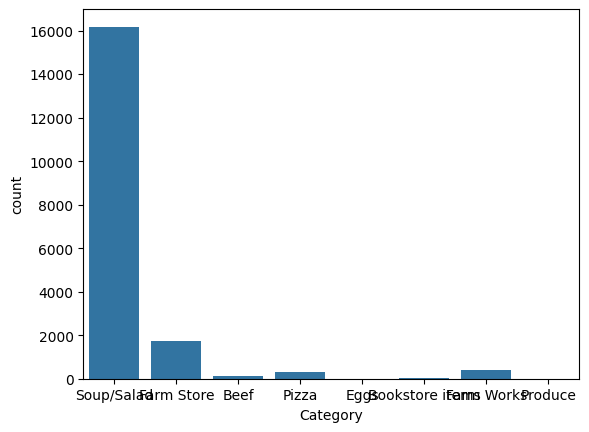

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(data = merged_df, x = 'Category')

### 7. Describing Categorical Attribtues

In [48]:
print(merged_df.columns)

Index(['Date', 'Time', 'Time Zone', 'Category', 'Item', 'Qty',
       'Price Point Name', 'SKU', 'Modifiers Applied', 'Gross Sales',
       'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Payment ID',
       'Device Name', 'Notes', 'Details', 'Event Type', 'Location',
       'Dining Option', 'Customer ID', 'Customer Name',
       'Customer Reference ID', 'Unit', 'Count', 'Itemization Type',
       'Fulfillment Note', 'Token'],
      dtype='object')


In [49]:
# Value Counts for Categorical Columns

#Print the value counts for categorical columns
for col in merged_df.columns:
  if merged_df[col].dtype == 'object':
    print('\nColumn Name:', col,)
    print(merged_df[col].value_counts())
    print()


Column Name: Time
Time
12:24:40    16
12:44:35    16
18:34:30    16
11:23:26    15
11:38:18    14
            ..
11:15:11     1
12:10:30     1
11:15:01     1
11:11:20     1
13:55:54     1
Name: count, Length: 8920, dtype: int64


Column Name: Time Zone
Time Zone
Eastern Time (US & Canada)    20991
Name: count, dtype: int64


Column Name: Category
Category
Soup/Salad         16178
Farm Store          1728
Farm Works           410
Pizza                326
Beef                 124
Bookstore items       16
Eggs                   6
Produce                3
Name: count, dtype: int64


Column Name: Item
Item
1/2 Soup - 1/2 Salad - Dickinson Student w. Meal Plan            6914
Soup - Dickinson Student w. Meal Plan                            3875
Salad - Dickinson Student w. Meal Plan                           2486
Custom Amount                                                    2171
1/2 Soup - 1/2 Salad - Non Dickinson Student or Non-Meal Plan     836
                                        

In [51]:
# dropping time_zone
merged_df.drop(['Time Zone','SKU','Modifiers Applied','Notes','Details'], axis=1, inplace=True)

merged_df.head()

,Date,Time,Category,Item,Qty,Price Point Name,Gross Sales,Discounts,Net Sales,Tax,...,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID,Unit,Count,Itemization Type,Fulfillment Note,Token
0,2023-09-01,11:04:07,Soup/Salad,Soup - Non-Dickinson Student or Non-Meal Plan,1.0,Regular,5.0,0.0,5.0,0.3,...,Farm Works,NaN,7192H4V4CMX48AR6GNENJJWP3W,Sara Galli,NaN,ea,1,Physical Good,NaN,FS3KUKFBMGFUYW7BYAAVUTDK
1,2023-09-01,11:04:07,Farm Store,Beef Jerky - SMOKE,1.0,Small,7.0,0.0,7.0,0.0,...,Farm Works,NaN,7192H4V4CMX48AR6GNENJJWP3W,Sara Galli,NaN,ea,1,Physical Good,NaN,UUFDSYQ3C7EWT72TSC26O33V
2,2023-09-01,11:04:36,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1.0,Regular,3.0,0.0,3.0,0.0,...,Farm Works,NaN,D6YVPT93JC86M1QQ8XM7XPQ4R8,Hadley Desopo,NaN,ea,1,Physical Good,NaN,AICC5MG4FOI3TUB5AY3BZ56B
3,2023-09-01,11:05:24,Soup/Salad,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1.0,Regular,3.0,0.0,3.0,0.0,...,Farm Works,NaN,NaN,NaN,NaN,ea,1,Physical Good,NaN,AMPTL7VEDPUS4UQ5WZHE22SB
4,2023-09-01,11:06:12,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1.0,Regular,3.0,0.0,3.0,0.0,...,Farm Works,NaN,NaN,NaN,NaN,ea,1,Physical Good,NaN,AICC5MG4FOI3TUB5AY3BZ56B


In [57]:
# Creating day column
# Ensure the 'date' column is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Extract the day and create a new column
merged_df['Day'] = merged_df['Date'].dt.day_name()
merged_df.head()

,Date,Time,Category,Item,Qty,Price Point Name,Gross Sales,Discounts,Net Sales,Tax,...,Dining Option,Customer ID,Customer Name,Customer Reference ID,Unit,Count,Itemization Type,Fulfillment Note,Token,Day
0,2023-09-01,11:04:07,Soup/Salad,Soup - Non-Dickinson Student or Non-Meal Plan,1.0,Regular,5.0,0.0,5.0,0.3,...,NaN,7192H4V4CMX48AR6GNENJJWP3W,Sara Galli,NaN,ea,1,Physical Good,NaN,FS3KUKFBMGFUYW7BYAAVUTDK,Friday
1,2023-09-01,11:04:07,Farm Store,Beef Jerky - SMOKE,1.0,Small,7.0,0.0,7.0,0.0,...,NaN,7192H4V4CMX48AR6GNENJJWP3W,Sara Galli,NaN,ea,1,Physical Good,NaN,UUFDSYQ3C7EWT72TSC26O33V,Friday
2,2023-09-01,11:04:36,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1.0,Regular,3.0,0.0,3.0,0.0,...,NaN,D6YVPT93JC86M1QQ8XM7XPQ4R8,Hadley Desopo,NaN,ea,1,Physical Good,NaN,AICC5MG4FOI3TUB5AY3BZ56B,Friday
3,2023-09-01,11:05:24,Soup/Salad,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1.0,Regular,3.0,0.0,3.0,0.0,...,NaN,NaN,NaN,NaN,ea,1,Physical Good,NaN,AMPTL7VEDPUS4UQ5WZHE22SB,Friday
4,2023-09-01,11:06:12,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1.0,Regular,3.0,0.0,3.0,0.0,...,NaN,NaN,NaN,NaN,ea,1,Physical Good,NaN,AICC5MG4FOI3TUB5AY3BZ56B,Friday


In [60]:
# Reordering Day column next to Date
# Move 'day' column next to 'date' column
cols = merged_df.columns.tolist()  # Get the list of all columns
cols.insert(cols.index('Date') + 1, cols.pop(cols.index('Day')))  # Move 'day' right after 'date'
merged_df = merged_df[cols]  # Reorder the DataFrame with the updated column order
merged_df.head()

,Date,Day,Time,Category,Item,Qty,Price Point Name,Gross Sales,Discounts,Net Sales,...,Location,Dining Option,Customer ID,Customer Name,Customer Reference ID,Unit,Count,Itemization Type,Fulfillment Note,Token
0,2023-09-01,Friday,11:04:07,Soup/Salad,Soup - Non-Dickinson Student or Non-Meal Plan,1.0,Regular,5.0,0.0,5.0,...,Farm Works,NaN,7192H4V4CMX48AR6GNENJJWP3W,Sara Galli,NaN,ea,1,Physical Good,NaN,FS3KUKFBMGFUYW7BYAAVUTDK
1,2023-09-01,Friday,11:04:07,Farm Store,Beef Jerky - SMOKE,1.0,Small,7.0,0.0,7.0,...,Farm Works,NaN,7192H4V4CMX48AR6GNENJJWP3W,Sara Galli,NaN,ea,1,Physical Good,NaN,UUFDSYQ3C7EWT72TSC26O33V
2,2023-09-01,Friday,11:04:36,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1.0,Regular,3.0,0.0,3.0,...,Farm Works,NaN,D6YVPT93JC86M1QQ8XM7XPQ4R8,Hadley Desopo,NaN,ea,1,Physical Good,NaN,AICC5MG4FOI3TUB5AY3BZ56B
3,2023-09-01,Friday,11:05:24,Soup/Salad,1/2 Soup - 1/2 Salad - Dickinson Student w. Me...,1.0,Regular,3.0,0.0,3.0,...,Farm Works,NaN,NaN,NaN,NaN,ea,1,Physical Good,NaN,AMPTL7VEDPUS4UQ5WZHE22SB
4,2023-09-01,Friday,11:06:12,Soup/Salad,Soup - Dickinson Student w. Meal Plan,1.0,Regular,3.0,0.0,3.0,...,Farm Works,NaN,NaN,NaN,NaN,ea,1,Physical Good,NaN,AICC5MG4FOI3TUB5AY3BZ56B


In [61]:
# Checking if it's correctly categorized
print(merged_df['Day'].nunique())
print(merged_df['Day'].unique())

7
['Friday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Saturday']


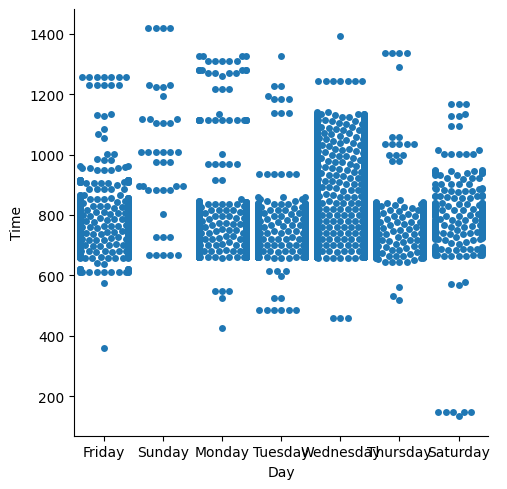

In [65]:
# Import necessary libraries
import pandas as pd
import seaborn as sns

# Assuming 'merged_df' is your DataFrame

# Convert 'Time' column to numeric (total minutes)
# Access hour and minute directly if 'Time' column contains datetime.time objects
merged_df['Time'] = merged_df['Time'].apply(lambda x: x.hour * 60 + x.minute)

# Now create the catplot
sns.catplot(data=merged_df, x='Day', y='Time', kind='swarm')